In [66]:
from random import choice as c
from numpy import array as a
from numpy import zeros as z


def s(n):
    p, e = [z(2)], [a([-1, -1]), a([0, 1]), a([1, -1])]
    for i in range(n):
        p.append((p[i] + c(e)) / 2)
    return list(zip(*p))

In [79]:
import random
import numpy as np

# set type to make code clearer
Point = np.ndarray

edge_points = [
    np.array([-1, -1]),
    np.array([0, 1]),
    np.array([1, -1]),
]


def compute_midpoint(point_1: Point, point_2: Point) -> Point:
    # takes in two points and returns the halfway point between them
    return (point_1 + point_2) / 2


def select_edge_point(points: list[Point]) -> Point:
    # randomly selects one point from a list of points
    return random.choice(points)


def run_sierpinski_ifs(
    number_of_iterations: int,
    starting_point: Point = np.zeros(2),
) -> tuple[list[float], list[float]]:
    # create an empty list for recording the points
    point_history = list()
    # place the first point (0, 0) in the list
    point_history.append(starting_point)
    # run the IFS
    for iteration_index in range(number_of_iterations):
        last_point = point_history[iteration_index]
        edge_point = select_edge_point(edge_points)
        next_point = compute_midpoint(point_1=last_point, point_2=edge_point)
        point_history.append(next_point)
    # split the list of points like so:
    # [[0,1], [2, 3], [4, 5]] -> [[0, 2, 4], [1, 3, 5]]
    x_points, y_points = list(zip(*point_history))
    x_points = [float(x) for x in x_points]
    y_points = [float(y) for y in y_points]
    # return the results
    return x_points, y_points

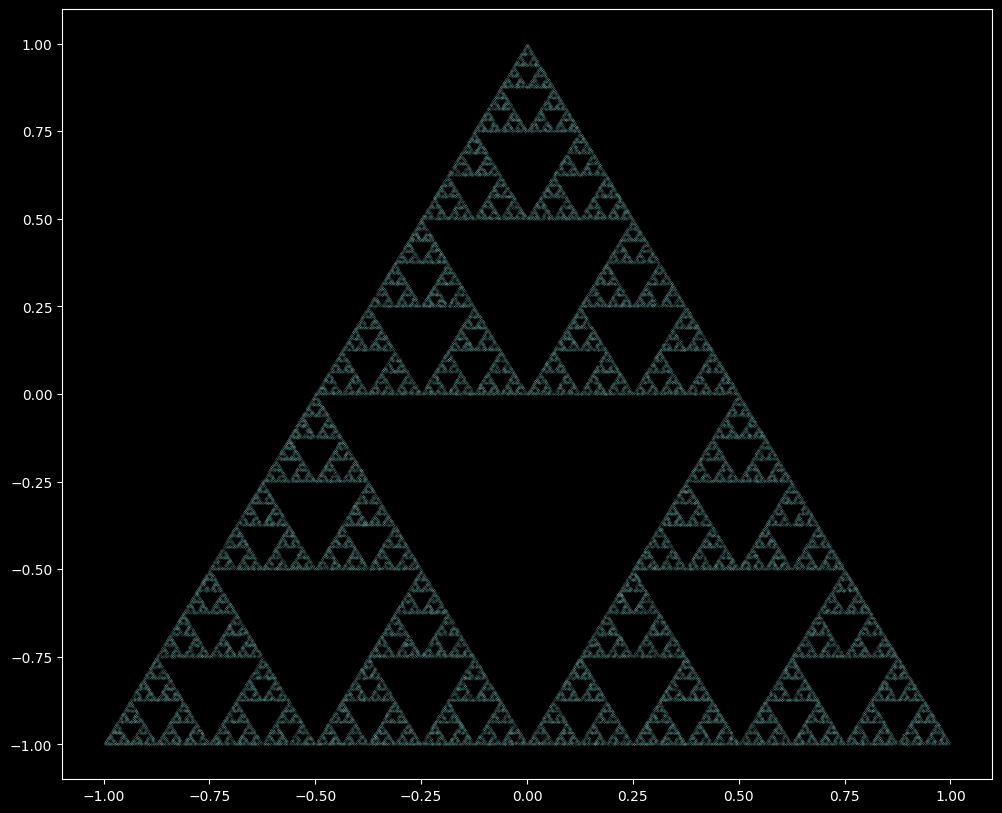

In [80]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

fig = plt.figure(figsize=(12, 10))
plt.scatter(*run_sierpinski_ifs(1_00_000), alpha=0.6, s=0.005)

In [64]:
"""
- Contains a midpoint equation generation class
- contains an operation handler class as a resource for midpoint generation class
- Also contains a class to load a midpoint equation as a function,
and

? Include tanh function, what other operations can be included?
"""

import numpy as np
from tqdm import tqdm
from numpy import sin, cos, tan
from math import log
from typing import Callable

In [ ]:
Point = np.ndarray
Edge = np.ndarray
Edges = list[Edge]
PointHistory = list[Point]
EdgeHistory = list[Edge]


class IFS:
    def __init__(
        self,
        vertices: Edges,
        midpoint: str | Callable[[Point, Point], Point],
        selector: Callable[[Edges, PointHistory, EdgeHistory], Edge],
        starting: Point = np.array([0, 0]),
    ) -> None:
        self.vertices = vertices
        self.midpoint = midpoint
        self.selector = selector
        self.starting = starting

In [65]:
class OperationHandler:
    def __init__(self, components: list[str], bias: list[float] = None) -> None:
        if bias is not None:
            assert len(components) == len(bias)
        self.components = components
        self.bias = bias
        self.operations = {
            "add": lambda components, bias: f"({' + '.join([np.random.choice(components, p=bias), np.random.choice(components, p=bias)])})",
            "subtract": lambda components, bias: f"({' - '.join([np.random.choice(components, p=bias), np.random.choice(components, p=bias)])})",
            "multiply": lambda components, bias: f"({' * '.join([np.random.choice(components, p=bias), np.random.choice(components, p=bias)])})",
            "divide": lambda components, bias: f"({' / '.join([np.random.choice(components, p=bias), np.random.choice(components, p=bias)])})",
            "exponent": lambda components, bias: f"({' ** '.join([np.random.choice(components, p=bias), np.random.choice(components, p=bias)])})",
            "logarithm": lambda components, bias: f"(log({np.random.choice(components, p=bias)}, {np.random.choice(components, p=bias)}))",
            "sin": lambda components, bias: f"(sin({np.random.choice(components, p=bias)}))",
            "cos": lambda components, bias: f"(cos({np.random.choice(components, p=bias)}))",
            "tan": lambda components, bias: f"(tan({np.random.choice(components, p=bias)}))",
        }

    def add(self):
        return self.operations["add"](self.components, self.bias)

    def subtract(self):
        return self.operations["subtract"](self.components, self.bias)

    def multiply(self):
        return self.operations["multiply"](self.components, self.bias)

    def divide(self):
        return self.operations["divide"](self.components, self.bias)

    def exponent(self):
        return self.operations["exponent"](self.components, self.bias)

    def logarithm(self):
        return self.operations["logarithm"](self.components, self.bias)

    def sin(self):
        return self.operations["sin"](self.components, self.bias)

    def cos(self):
        return self.operations["cos"](self.components, self.bias)

    def tan(self):
        return self.operations["tan"](self.components, self.bias)

    def random(self):
        return self.operations[np.random.choice(list(self.operations.keys()))](
            self.components, self.bias
        )

In [56]:
oh = OperationHandler(components=["(A + B)", "B", "C"], bias=[0.1, 0.4, 0.5])
oh.add()

'(C + (A + B))'

In [5]:
class EquationGenerator:
    def __init__(
        self, params: list[str], bias: list[float], layers: list[int], n: int
    ) -> None:
        self.params = params
        self.bias = bias
        self.layers = layers
        self.n = n
        self.string_params = ", ".join(params)

    def generate_list_of_components(
        self, params: list[str], bias: list[float], n: int
    ) -> list[str]:
        op = OperationHandler(params, bias)
        return [op.random() for _ in range(n)]

    def generate_equation(
        self, params: list[str], bias: list[float], layers: list[int]
    ):
        if layers[-1] != 1:
            layers.append(1)
        for i in layers:
            params = self.generate_list_of_components(params, bias, i)
            bias = None  # bias can only be applied on first round
        equation = params[0]
        equation = f"f({self.string_params}) = {equation}"
        return equation

    def generate_equations(
        self, params: list[str], bias: list[float], layers: list[int], n: int
    ):
        return [self.generate_equation(params, bias, layers) for _ in tqdm(range(n))]

    def run(self):
        return self.generate_equations(self.params, self.bias, self.layers, self.n)

In [ ]:
eg = EquationGenerator()

In [57]:
class EquationLoader:
    def __init__(self) -> None:
        pass

    def load(self, equation):
        """
        example: "f(A, B, x, y) = ((log((A ** A), (A + x))) / (log((A ** A), (A + x))))"
        """
        front, back = equation.split(" = ")
        string_params = front[2:-1]
        func_lambda = "".join(["lambda ", string_params, ": "])
        function = eval(f"{func_lambda}{back}")
        variables = string_params.split(", ")
        return function, variables, equation

In [59]:
el = EquationLoader()
func, vars, eq = el.load("f(x, y) = (x + y) / 2")

In [63]:
eq

'f(x, y) = (x + y) / 2'

In [61]:
func(3, 4)

3.5

In [3]:
class Midpoint:
    def __init__(self, function, variables, equation) -> None:
        self.__validate(variables)
        self.function = function
        self.variables = variables
        self.equation = equation

    def __validate(self, variables):
        assert len(set(variables).intersection({"A", "B"})) == 2

    def set_params(self, **kwargs):
        self.params = kwargs

    def execute(self, A, B):
        return self.function(A, B, **self.params)